<a href="https://colab.research.google.com/github/eslammuhammaad/Vit-image-classification/blob/main/image_classification_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-Tuning Vision Transformers for Image Classification

Just as transformers-based models have revolutionized NLP, we're now seeing an explosion of papers applying them to all sorts of other domains. One of the most revolutionary of these was the Vision Transformer (ViT), which was introduced in [June 2021](https://arxiv.org/abs/2010.11929) by a team of researchers at Google Brain.

This paper explored how you can tokenize images, just as you would tokenize sentences, so that they can be passed to transformer models for training. Its quite a simple concept, really...

1. Split an image into a grid of sub-image patches
1. Embed each patch with a linear projection
1. Each embedded patch becomes a token, and the resulting sequence of embedded patches is the sequence you pass to the model.

![vit_figure.png](https://raw.githubusercontent.com/google-research/vision_transformer/main/vit_figure.png)


It turns out that once you've done the above, you can pre-train and finetune transformers just as you're used to with NLP tasks. Pretty sweet 😎.

---

In this notebook, we'll walk through how to leverage 🤗 `datasets` to download and process image classification datasets, and then use them to fine-tune a pre-trained ViT with 🤗 `transformers`. 

To get started, lets first install both those packages.

In [ ]:
! pip install datasets transformers

In [ ]:
from datasets import load_dataset

ds = load_dataset('cifar100')
ds

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to /root/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [ ]:
ex = ds['train'][400]
ex

{'coarse_label': 0,
 'fine_label': 95,
 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7F668D8D1810>}

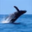

In [ ]:
image = ex['img']
image

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [ ]:
labels = ds['train'].features['fine_label']
labels

ClassLabel(num_classes=100, names=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'cra', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'w

In [ ]:
labels.int2str(ex['fine_label'])

'whale'

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [ ]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.0667,  0.0667,  0.0667,  ...,  0.0275,  0.0275,  0.0275],
          [ 0.0667,  0.0667,  0.0667,  ...,  0.0275,  0.0275,  0.0275],
          [ 0.0667,  0.0667,  0.0667,  ...,  0.0275,  0.0275,  0.0275],
          ...,
          [-0.5059, -0.5059, -0.5059,  ..., -0.6549, -0.6549, -0.6549],
          [-0.5059, -0.5059, -0.5059,  ..., -0.6549, -0.6549, -0.6549],
          [-0.5059, -0.5059, -0.5059,  ..., -0.6549, -0.6549, -0.6549]],

         [[ 0.4510,  0.4510,  0.4510,  ...,  0.4275,  0.4275,  0.4275],
          [ 0.4510,  0.4510,  0.4510,  ...,  0.4275,  0.4275,  0.4275],
          [ 0.4510,  0.4510,  0.4510,  ...,  0.4275,  0.4275,  0.4275],
          ...,
          [ 0.0745,  0.0745,  0.0745,  ..., -0.0196, -0.0196, -0.0196],
          [ 0.0745,  0.0745,  0.0745,  ..., -0.0196, -0.0196, -0.0196],
          [ 0.0745,  0.0745,  0.0745,  ..., -0.0196, -0.0196, -0.0196]],

         [[ 0.9059,  0.9059,  0.9059,  ...,  0.8745,  0.8745,  0.8745],
          [ 0

In [ ]:
def process_example(example):
    inputs = feature_extractor(example['img'], return_tensors='pt')
    inputs['labels'] = example['fine_label']
    return inputs

In [ ]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.4275,  0.4275,  0.4275],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.4275,  0.4275,  0.4275],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.4275,  0.4275,  0.4275],
          ...,
          [-0.3176, -0.3176, -0.3176,  ...,  0.0824,  0.0824,  0.0824],
          [-0.3176, -0.3176, -0.3176,  ...,  0.0824,  0.0824,  0.0824],
          [-0.3176, -0.3176, -0.3176,  ...,  0.0824,  0.0824,  0.0824]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.5216,  0.5216],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.5216,  0.5216],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.5216,  0.5216],
          ...,
          [-0.0431, -0.0431, -0.0431,  ...,  0.3569,  0.3569,  0.3569],
          [-0.0431, -0.0431, -0.0431,  ...,  0.3569,  0.3569,  0.3569],
          [-0.0431, -0.0431, -0.0431,  ...,  0.3569,  0.3569,  0.3569]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.3098,  0.3098,  0.3098],
          [ 1

In [ ]:
ds = load_dataset('cifar100')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['img']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['fine_label']
    return inputs

prepared_ds = ds.with_transform(transform)

Reusing dataset cifar100 (/root/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prepared_ds = ds.with_transform(transform)

In [ ]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.4275,  0.4275,  0.4275],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.4275,  0.4275,  0.4275],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.4275,  0.4275,  0.4275],
          ...,
          [-0.3176, -0.3176, -0.3176,  ...,  0.0824,  0.0824,  0.0824],
          [-0.3176, -0.3176, -0.3176,  ...,  0.0824,  0.0824,  0.0824],
          [-0.3176, -0.3176, -0.3176,  ...,  0.0824,  0.0824,  0.0824]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.5216,  0.5216],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.5216,  0.5216],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.5216,  0.5216],
          ...,
          [-0.0431, -0.0431, -0.0431,  ...,  0.3569,  0.3569,  0.3569],
          [-0.0431, -0.0431, -0.0431,  ...,  0.3569,  0.3569,  0.3569],
          [-0.0431, -0.0431, -0.0431,  ...,  0.3569,  0.3569,  0.3569]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.3098,  0.3098,  0.3098],
          [ 1

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [ ]:
from transformers import ViTForImageClassification

labels = ds['train'].features['fine_label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans-demo-v5",
  per_device_train_batch_size=16,
  evaluation_strategy="epoch",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  logging_strategy='epoch'
)

PyTorch: setting up devices


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=feature_extractor,
)

Cloning https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5 into local empty directory.
Using amp half precision backend


In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 50000
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 12500


Epoch,Training Loss,Validation Loss,Accuracy
1,1.080000,0.619641,0.826200
2,0.381600,0.532245,0.855500
3,0.161900,0.481741,0.876500
4,0.044300,0.442010,0.898500


Saving model checkpoint to ./vit-base-beans-demo-v5/checkpoint-100
Configuration saved in ./vit-base-beans-demo-v5/checkpoint-100/config.json
Model weights saved in ./vit-base-beans-demo-v5/checkpoint-100/pytorch_model.bin
Feature extractor saved in ./vit-base-beans-demo-v5/checkpoint-100/preprocessor_config.json
Feature extractor saved in ./vit-base-beans-demo-v5/preprocessor_config.json
Saving model checkpoint to ./vit-base-beans-demo-v5/checkpoint-200
Configuration saved in ./vit-base-beans-demo-v5/checkpoint-200/config.json
Model weights saved in ./vit-base-beans-demo-v5/checkpoint-200/pytorch_model.bin
Feature extractor saved in ./vit-base-beans-demo-v5/checkpoint-200/preprocessor_config.json
Saving model checkpoint to ./vit-base-beans-demo-v5/checkpoint-300
Configuration saved in ./vit-base-beans-demo-v5/checkpoint-300/config.json
Model weights saved in ./vit-base-beans-demo-v5/checkpoint-300/pytorch_model.bin
Feature extractor saved in ./vit-base-beans-demo-v5/checkpoint-300/pre

Upload file pytorch_model.bin:   0%|          | 3.34k/328M [00:00<?, ?B/s]

Upload file runs/May18_23-36-34_12b95d1959eb/events.out.tfevents.1652917010.12b95d1959eb.80.0:  35%|###5      …

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5
   8fff725..3ab0865  main -> main

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5
   3ab0865..8991268  main -> main



***** train metrics *****
  epoch                    =           4.0
  total_flos               = 14446685865GF
  train_loss               =         0.417
  train_runtime            =    1:29:40.07
  train_samples_per_second =        37.174
  train_steps_per_second   =         2.323


In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 10000
  Batch size = 8


***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.8985
  eval_loss               =      0.442
  eval_runtime            = 0:01:41.55
  eval_samples_per_second =     98.467
  eval_steps_per_second   =     12.308


In [ ]:
from huggingface_hub import HfApi, HfFolder, Repository, notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'Cifar100',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

Saving model checkpoint to ./vit-base-beans-demo-v5
Configuration saved in ./vit-base-beans-demo-v5/config.json
Model weights saved in ./vit-base-beans-demo-v5/pytorch_model.bin
Feature extractor saved in ./vit-base-beans-demo-v5/preprocessor_config.json


Upload file runs/May18_23-36-34_12b95d1959eb/events.out.tfevents.1652922962.12b95d1959eb.80.2: 100%|##########…

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5
   8991268..b760e8b  main -> main

remote: Allowed refs: all        
To https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5
   8991268..b760e8b  main -> main

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5
   b760e8b..33677f4  main -> main

remote: Allowed refs: all        
To https://huggingface.co/Ahmed9275/vit-base-beans-demo-v5
   b760e8b..33677f4  main -> main

